# $$
\text{Calcul approché d'intégrales}
$$

### Objectifs :

- implémenter les méthodes des rectangles et des trapèzes, puis estimer leur vitesse de convergence ;
- utiliser les routines du module integrate de scipy ;
- introduire la méthode de Monte Carlo.

## I. Méthode des rectangles et des trapèzes

### 1. Méthodes des rectangles

Les méthodes des rectangles sont basées sur la définition de l'intégrale au sens de Riemann. L'intervalle $[a, b]$ est subdivisé via $n+1$ points équidistants $(x_i)_{0 \leq i \leq n}$ définis par
$$
\forall 0 \leq i \leq n, \, x_i = a + \frac{i (b - a)}{n}.
$$
Sur chaque intervale $]x_i, x_{i+1}[$, la fonction $f$ est ensuite approchée par une fonction $f_i$ constante.

Dans la méthode des rectangles à gauche, la valeur de la constante $f_i$ est fixée égale à la valeur en $x_i$ de la fonction $f$, et l'intégrale $I = \int_a^b f(x) \,dx$ est approchée par la formule
$$
J_n = \sum_{i = 0}^{n-1} \int_{x_i}^{x_{i + 1}} f_i(x) \, dx = \frac{b-a}{n} \sum_{i=0}^{n-1} f(x_i). 
$$
Il découle de l'inégalité des accroissements finis que, lorsque la fonction $f$ est de classe $\mathcal{C}^1$ sur $[a, b]$, alors
$$
\Big| \int_a^b f(x) \, dx - J_n \Big| \leq \frac{(b-a)^2 \| f' \|_{L^\infty([a, b])}}{n}.
$$
La méthode des rectangles à gauche est donc d'ordre $0$. De façon générale, une méthode de calcul approché d'intégrales est en effet d'ordre $\alpha$ lorsque l'erreur dans l'approximation numérique est de taille $1/n^{\alpha + 1}$.

La fonction suivante `rectangle(f,a,b,n)` approche la valeur de l'intégrale $I$ par la méthode des rectangles à gauche :

In [1]:
import numpy as np
def rectangle(f,a,b,n):
    x=np.linspace(a,b,n,endpoint=False) # la mention endpoint=False permet de ne pas inclure le point b
    y=f(x)
    return(np.sum(y)*(b-a)/n)
# Test de la fonction rectangle pour le calcul de l'intégrale de la fonction f(x)=1/(1+x^2) sur [0,1]
def fonctiontest(x):
    return(1/(1+x**2))
I1=rectangle(fonctiontest,0,1,1000)
print('I =',I1,'\n')
print(I1-np.pi/4)

I = 0.7856481217307817 

0.000249958333333411


La fonction `plot_rectangles(f,a,b,n)` suivante représente graphiquement l'approximation par la méthode des rectangles à gauche :

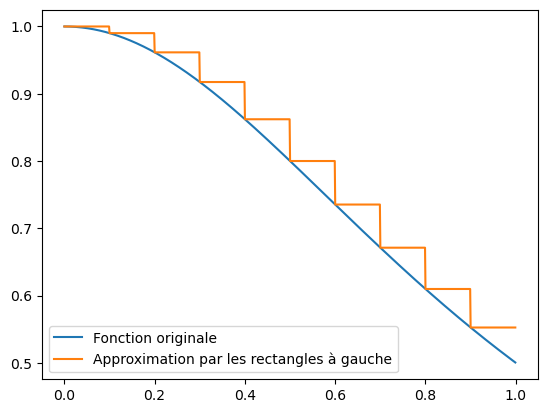

In [2]:
from matplotlib import pyplot as plt
def plot_rectangles(f,a,b,n):
    N=100*n
    x=np.linspace(a,b,N,endpoint=False)
    y=f(x)
    z=np.zeros([N])
    for i in range(n):
        for j in range(100):
            z[i*100+j]=y[i*100]
    plt.plot(x,y,label="Fonction originale")
    plt.plot(x,z,label="Approximation par les rectangles à gauche")
    plt.legend()
    plt.show()
plot_rectangles(fonctiontest,0,1,10)

Lorsque la valeur de l'intégrale $I$ est connue, nous pouvons illustrer la vitesse de convergence de la méthode des rectangles à gauche en représentant les erreurs
$$
e_n = |I -J_n|,
$$
en fonction de l'entier $n$. Le code suivant représente ces erreurs avec des échelles logarithmiques à la fois pour les valeurs de cette suite et pour celles de $n$ :

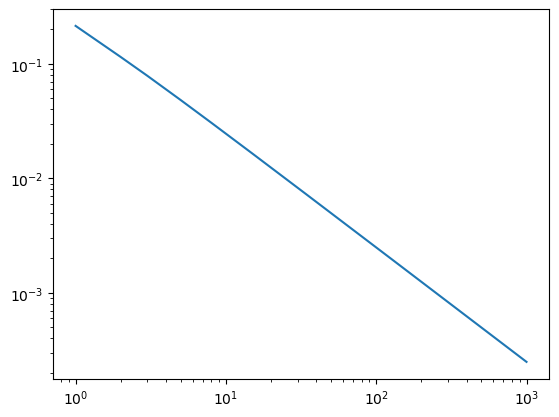

In [3]:
x=np.array([n+1 for n in range(1000)])
y=np.array([abs(rectangle(fonctiontest,0,1,n+1)-np.pi/4) for n in range(1000)])
plt.loglog(x,y)
plt.show()

La courbe est asymptotique à une droite de pente négative proche de $- 1$ pour $n$ grand, c'est-à-dire que $\log(e_n) \sim c - \log(n)$, soit que $e_n \sim C/n$ pour $C = e^c$. Nous retrouvons bien le fait que la méthode des rectangles à gauche est une méthode d'ordre $0$.

Notons enfin qu'il existe d'autres méthodes des rectangles obtenues pour des choix différents des fonctions $f_i$, par exemple la méthodes du point milieu pour laquelle
$$
f_i = f \big( \frac{x_i + x_{i+1}}{2} \big),
$$
ou celle des rectangles à droite pour laquelle
$$
f_i = f(x_{i+1}).
$$

### 2. Méthode des trapèzes

La méthode des trapèzes est basée sur une approximation affine sur chaque intervalle $]x_i, x_{i+1}[$ donnée par l'expression
$$
\forall x \in ]x_i, x_{i+1}[, \, f_i(x) = f(x_i) + \frac{n (x - x_i) (f(x_{i+1}) - f(x_i))}{b-a},
$$
qui conduit à la valeur approchée de l'intégrale
$$
I = \sum_{i=0}^{n-1} \int_{x_i}^{x_{i+1}} f_i(x) \, dx = \frac{b-a}{n} \sum_{i=0}^{n-1} \frac{f(x_{i+1}) + f(x_i)}{2}.
$$
La fonction `trapezes(f,a,b,N)` suivante renvoie l'approximation de l'intégrale $I$ par la méthode des trapèzes :

In [4]:
def trapezes(f,a,b,n):
    x=np.linspace(a,b,n+1)
    y=f(x)
    J=((b-a)/n)*(f(a)/2+f(b)/2+np.sum(y[1:n]))
    return(J)
# Test de la fonction trapezes pour le calcul de l'intégrale de la fonction f(x)=1/(1+x^2) sur [0,1]
I2=trapezes(fonctiontest,0,1,1000)
print('I =',I2,'\n')
print(I2-np.pi/4)

I = 0.7853981217307817 

-4.1666666561468446e-08


Nous pouvons à nouveau représenter empiriquement la convergence de la méthode des trapèzes pour le calcul de cette intégrale en représentant l'erreur en fonction de $n$ dans un graphique où les deux échelles sont logarithmiques :

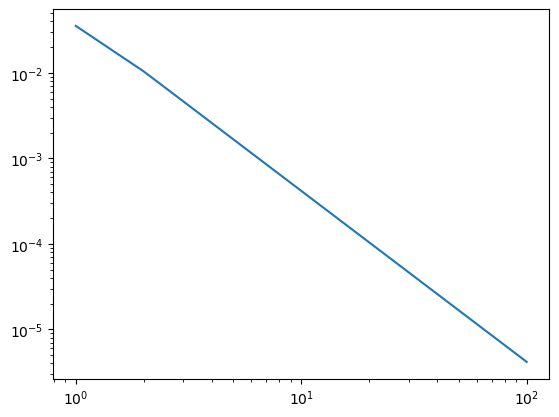

In [5]:
A=np.array([n+1 for n in range(100)])
B=np.array([abs(trapezes(fonctiontest,0,1,n+1)-np.pi/4) for n in range(100)])
plt.loglog(A,B)
plt.show()

Nous constatons empiriquement que la méthode des trapèzes est d'ordre $1$.

## II. Intégration avec les routines de Scipy

Les méthodes d'intégrations précédentes sont codées dans le module `integrate` de scipy. Ce module permet de faire appel à ces méthodes sans les coder à nouveau. Il permet aussi de traiter des cas plus compliqués d'intégrales singulières, généralisées ou en plusieurs dimensions.

La routine `scipy.integrate.quad` qui repose sur la méthode de quadrature de Gauss renvoie une valeur approchée d'une intégrale d'une variable :

In [6]:
import scipy.integrate as sc_int
def fonctiontest3(x):
    return(1/(1+x**2))
I3=sc_int.quad(fonctiontest3,0,1)
print('I =',I3[0],'\n')
print(I3[0]-np.pi/4)

I = 0.7853981633974484 

1.1102230246251565e-16


Il est également possible de calculer une intégrale impropre :

In [7]:
J=sc_int.quad(fonctiontest3,-np.inf,+np.inf) # utilisation du module numpy pour l'infini via la commande numpy.inf
print('J =',J[0],'\n')
print(J[0]-np.pi)

J = 3.141592653589793 

0.0


Les routines `scipy.integrate.dblquad` et `scipy.integrate.tplquad` renvoient quant à elles le calcul d'intégrales doubles et triples :

In [8]:
def fonctiontest4(x,y):
    return(np.exp(-x**2-y**2))
K=sc_int.dblquad(fonctiontest4,-np.inf,np.inf,-np.inf,np.inf)
print('K =',K[0],'\n')
print(K[0]-np.pi)

K = 3.141592653589777 

-1.5987211554602254e-14


# III. Méthode de Monte-Carlo

La méthode de Monte-Carlo repose sur la notion d'intégrale au sens de Lebesgue. Il s'agit d'une approche probabiliste. Le principe de base est que l'intégrale $I = \int_a^b f(x) \, dx$ peut être vue comme l'espérance d'une variable aléatoire. Considérons en effet une variable aléatoire réelle $X$ de loi uniforme sur $[a, b]$, soit de densité $\mathbf{1}(a \leq x \leq b)/(b-a) \, dx$. La variable aléatoire $f(X)$ a alors pour espérance
$$
\mathbb{E}(f(X)) = \frac{1}{b-a} \int_a^b f(x) \, dx.
$$

Soit maintenant $(X_n)_{n \geq 0}$ une suite de variables aléatoires indépendantes, identiquemenent distribuées, de loi uniforme sur le segment $[a, b]$. Par la loi des grands nombres, la mesure empirique pour les variables $(f(X_n))_{n \geq 0}$ satisfait la convergence
$$
\lim_{n \to + \infty} \frac{1}{n} \sum_{i=0}^{n-1} f(X_n) = \mathbb{E}(f(X)) \quad \text{ p.s.},
$$
c'est-à-dire que
$$
\lim_{n \to + \infty} \frac{b - a}{n} \sum_{i=0}^{n-1} f(X_n) = \int_a^b f(x) \, dx \quad \text{ p.s.}.
$$
Pour calculer la moyenne empirique $\sum_{i=0}^{n-1} f(X_n)/n$, il suffit de tirer $n$ fois un nombre aléatoirement dans l'intervalle $[a, b]$. C'est sur ce constat que repose l'approximation de l'intégrale par la méthode de Monte-Carlo :
$$
J_n^{mc} = \frac{b - a}{n} \sum_{i=0}^{n-1} f(X_n).
$$
Lorsque la fonction $f$ appartient à l'espace $L^2([a, b])$, le théorème central limite assure que
$$
\Big| \frac{b - a}{n} \sum_{i=0}^{n-1} f(X_n) - \int_a^b f(x) \, dx \Big| = O \Big( \frac{1}{\sqrt{n}} \Big) \quad \text{ p.s.}
$$

La fonction `montecarlo(f,a,b,n)` suivante détermine une approximation de l'intégrale $I$ par la méthode de Monte-Carlo :

In [9]:
def montecarlo(f,a,b,n):
    x=0
    for i in range(n):
        x=x+f(np.random.uniform(a,b))
    x=(b-a)*x/n
    return(x)
# Test de la fonction montecarlo pour le calcul de l'intégrale de la fonction f(x)=1/(1+x^2) sur [0,1]
I4=montecarlo(fonctiontest,0,1,1000)
print('I =',I4,'\n')
print(I4-np.pi/4)

I = 0.7877505790684787 

0.0023524156710303945


Pour étudier empiriquement la convergence de la méthode de Monte-Carlo en fonction de $n$, nous calculons, pour un entier $k$ fixé, la moyenne des valeurs de l'approximation $J_n^{mc}$ obtenues par $k$ réalisations différentes, ainsi que la variance de ces réalisations, puis nous observons le comportement de ces quantités lorsque $n \to + \infty$ :

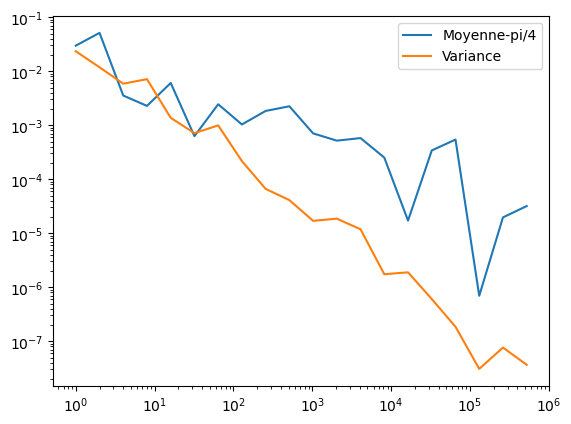

In [10]:
def montecarloemp(f,a,b,k,n):
    J=np.array([montecarlo(f,a,b,n) for j in range(k)])
    m=np.sum(J)/k
    v=np.sum((J-m)**2)/k
    return(m,v)
x=np.array([2**n for n in range(20)])
a=np.array([montecarloemp(fonctiontest,0,1,10,2**n) for n in range(20)])
y=np.array([abs(a[i,0]-np.pi/4) for i in range(20)])
z=np.array([a[i,1] for i in range(20)])
plt.loglog(x,y,label="Moyenne-pi/4")
plt.loglog(x,z,label="Variance")
plt.legend()
plt.show()

## Exercices

### Exercice 1 : la méthode du point milieu.

Considérons une fonction $f \in \mathcal{C}^0([a, b], \mathbb{R})$ dont nous cherchons à calculer l'intégrale $I = \int_a^b f(x) \, dx$. Étant donnée la subdivision équidistante $(x_i)_{0 \leq i \leq n}$ de ce segment, la méthode du point milieu consiste à approcher la fonction $f$ sur chaque intervalle $]x_i, x_{i + 1}[$ par la constante
$$
f_i = f \Big( \frac{x_i + x_{i+1}}{2} \Big),
$$
puis à approcher l'intégrale $I$ par le nombre
$$
J_n = \frac{b-a}{n} \sum_{i=0}^{n-1} f \Big( \frac{x_i + x_{i+1}}{2} \Big).
$$

1. Écrire une fonction `rectangles_centres(f,a,b,n)` qui calcule une telle approximation de la valeur de l'intégrale $I$.

In [11]:
def rectangles_centres(f,a,b,n):
    J=0
    for i in range(0,n):
        J=J+f(a+(b-a)*(2*i+1)/(2*n))
    return (b-a)/n*J
# Test de la fonction rectangles_centres pour la fonction g(x)=1/(1+x^2)
def g(x):
    return 1/(1+x**2)
J=rectangles_centres(g,0,1,50)
print('J_n =',J,'\n')
print(J-np.pi/4,'\n')

J_n = 0.7854064967307507 

8.333333302412704e-06 



2. Soit
$$
\forall 0 \leq x \leq 1, \, g(x) = \frac{1}{1+x^2}.
$$
Pour le calcul de l'intégrale de la fonction $g$, représenter l'erreur 
$$
e_n = \Big| J_n - \frac{\pi}{4} \Big|,
$$
en fonction de l'entier $n$ avec une échelle logarithmique pour les deux axes du graphique.

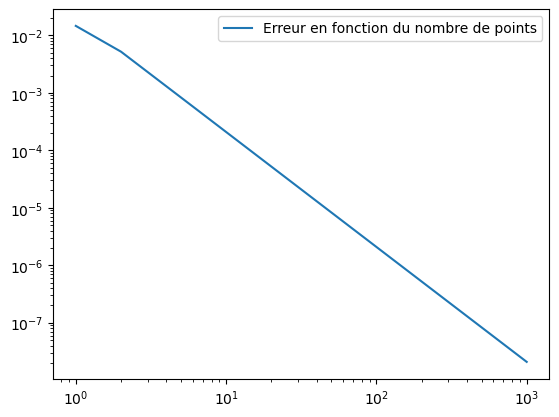

In [12]:
X=np.arange(1,1000,1)
Y=[]
for x in X:
    Y.append(np.abs(rectangles_centres(g,0,1,x)-np.pi/4))
plt.loglog(X,Y,label='Erreur en fonction du nombre de points')
plt.legend()
plt.show()

3. Nous souhaitons comparer la vitesse de convergence de la méthode des rectangles à gauche et de celle du point milieu pour le calcul de l'intégrale de la fonction $g$ afin de déterminer quelle méthode est la plus efficace. Représenter dans un même graphique avec échelles logarithmiques l'erreur pour chacune de ces méthodes. Quelle est la méthode la plus efficace ?

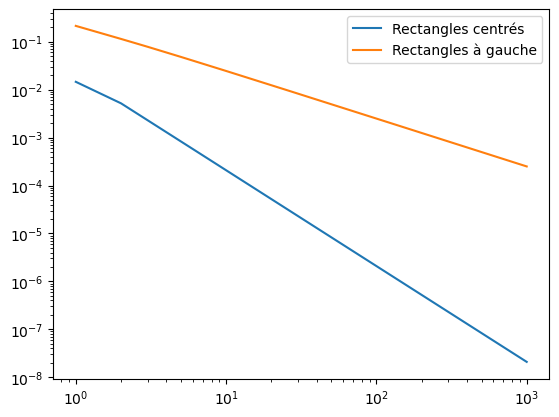

In [13]:
Z=[]
for x in X:
    Z.append(np.abs(rectangle(g,0,1,x)-np.pi/4))
plt.loglog(X,Y,label='Rectangles centrés')
plt.loglog(X,Z,label='Rectangles à gauche')
plt.legend()
plt.show()

L'erreur due à la méthode des rectangles centrés est plus petite que celle due à la méthode des rectangles à gauche. La méthode des rectangles centrés est donc plus efficace que celle des rectangles à gauche.

4. Déterminer l'ordre de la méthode du point milieu et expliquer la conclusion de la question 3.

Considérons les fonctions polynômes $(P_k)_{k \geq 0}$ définies par
$$
\forall k \geq 0, \, \forall x \in \mathbb{R}, \, P_k(x) = x^k,
$$
et rappelons que l'erreur associée à la méthode de quadrature élémentaire des rectangles centrés est défini par
$$
e(f) = 2 f(0) - \int_{-1}^1 f(x) \, dx,
$$
pour une fonction $f \in \mathcal{C}^0([-1,1],\mathbb{R})$. Nous pouvons alors calculer
$$
e(P_0) = 2 - 2 = 0, \quad e(P_1) = 0 - 0 = 0, \quad \text{ et } \quad e(P_2) = 0 - \frac{2}{3} \neq 0.
$$
La méthode des rectangles centrés est donc d'ordre $1$, tandis que la méthode des rectangles à gauche est d'ordre $0$, ce qui explique que la première soit plus efficace que la seconde. 

### Exercice 2 : la méthode de Simpson.

Considérons une fonction $f \in \mathcal{C}^0([a, b], \mathbb{R})$ dont nous cherchons à calculer l'intégrale $I = \int_a^b f(x) \, dx$. Étant donnée la subdivision équidistante $(x_i)_{0 \leq i \leq n}$ de ce segment, la méthode des rectangles consiste à approcher la fonction $f$ sur chaque intervalle $]x_i, x_{i+1}[$ par une fonction constante, tandis que la méthode des trapèzes repose sur une approximation par une fonction affine. La méthode de Simpson, quant à elle, consiste à approcher la fonction $f$ par un polynôme de degré deux. Le polynôme choisi est le polynôme d'interpolation de Lagrange de la fonction $f$ aux points $x_i$, $(x_i + x_{i+1})/2$ et $x_{i+1}$, soit le polynôme
$$
P_i(x) = a_i x^2 + b_i x + c_i,
$$
tel que
$$
P_i(x_i) = f(x_i), \quad P_i \Big( \frac{x_i + x_{i+1}}{2} \Big) = f \Big( \frac{x_i + x_{i+1}}{2} \Big) \quad \text{ et } \quad P_i(x_{i+1}) = f(x_{i+1}).
$$

1.a. Exprimer les coefficients $a_i$, $b_i$ et $c_i$ en fonction de $f(x_i)$, $f((x_i+x_{i+1})/2)$ et $f(x_{i+1})$.

Le choix du polynôme d'interpolation de Lagrange $P_i$ de la fonction $f$ aux points $x_i$, $(x_i+x_{i+1})/2$ et $x_{i+1}$ conduit au système
$$
\begin{cases}
a_i x_i^2 + b_i x_i + c_i = f(x_i), \\
a_i \frac{(x_i + x_{i+1})^2}{4} + b_i \frac{x_i + x_{i+1}}{2} + c_i = f \big(\frac{x_i + x_{i+1}}{2} \big), \\
a_i x_{i+1}^2 + b_i x_{i+1} + c_i = f(x_{i+1}),
\end{cases}
$$
qui s'écrit aussi
$$
\begin{cases}
c_i = f(x_i) - a_i x_i^2 - b_i x_i, \\
a_i \big( \frac{(x_i + x_{i+1})^2}{4} - x_i^2 \big) + b_i \frac{x_{i+1} - x_i}{2} = f \big(\frac{x_i + x_{i+1}}{2} \big) - f(x_i), \\
a_i \big( x_{i+1}^2 - x_i^2 \big) + b_i \big( x_{i+1} - x_i \big) = f(x_{i+1}) - f(x_i),
\end{cases}
$$
puis
$$
\begin{cases}
c_i = f(x_i) - a_i x_i^2 - b_i x_i, \\
b_i = \frac{f(x_{i+1}) - f(x_i)}{x_{i+1} - x_i} - a_i \big( x_{i+1} + x_i \big), \\
a_i \big( \frac{(x_i + x_{i+1})^2}{4} - x_i^2 - \frac{x_{i+1}^2 - x_i^2}{2} \big) = f \big(\frac{x_i + x_{i+1}}{2} \big) - f(x_i) - \frac{f(x_{i+1}) - f(x_i)}{2}.
\end{cases}
$$
Nous en déduisons que
$$
a_i = \frac{2}{(x_{i+1}-x_i)^2} \Big( f(x_i) + f(x_{i+1}) - 2 f \big(\frac{x_i + x_{i+1}}{2} \big) \Big),
$$
$$
b_i = \frac{1}{(x_{i+1}-x_i)^2} \Big( 4 (x_{i+1} + x_i) f \big(\frac{x_i + x_{i+1}}{2} \big) - (3 x_i + x_{i+1}) f(x_{i+1}) - (x_i + 3 x_{i+1}) f(x_i) \Big),
$$
et
$$
c_i = \frac{1}{(x_{i+1}-x_i)^2} \Big( - 4 x_i x_{i+1} f \big(\frac{x_i + x_{i+1}}{2} \big) + x_i (x_i + x_{i+1}) f(x_{i+1}) + x_{i+1} (x_i + x_{i+1}) f(x_i) \Big).
$$

b. En déduire la valeur de intégrale $\int_{x_i}^{x_{i+1}} P_i(x) \, dx$.

Par définition du polynôme $P_i$, nous calculons
\begin{align*}
\int_{x_i}^{x_{i+1}} P_i(x) \, dx = & a_i \int_{x_i}^{x_{i+1}} x^2 \, dx + b_i \int_{x_i}^{x_{i+1}} x \, dx + c_i \int_{x_i}^{x_{i+1}} 1 \, dx \\
= & a_i \frac{x_{i+1}^3 - x_i^3}{3} + b_i \frac{x_{i+1}^2 - x_i^2}{2} + c_i (x_{i+1} - x_i) \\
= & (x_{i+1} - x_i) \Big( \frac{a_i}{3} (x_{i+1}^2 + x_i x_{i+1} + x_i^2) + \frac{b_i}{2} (x_{i+1} + x_i) + c_i \Big).
\end{align*}
Nous déduisons donc des formules de la question 1.a que
$$
\begin{align*}
\int_{x_i}^{x_{i+1}} P_i(x) \, dx = \frac{1}{6 (x_{i+1}-x_i)} & \Big( f(x_i) (x_{i+1} - x_i)^2 + 4 f \big(\frac{x_i + x_{i+1}}{2} \big) (x_{i+1} - x_i)^2 + f(x_{i+1}) (x_{i+1} - x_i)^2 \Big) \\
= & \frac{x_{i+1} - x_i}{6} \Big( f(x_i) + 4 f \big(\frac{x_i + x_{i+1}}{2} \big) + f(x_{i+1}) \Big).
\end{align*}
$$

c. Conclure que la méthode de Simpson approche l'intégrale $I$ par la valeur
$$
J_n^{sim} = \frac{b-a}{6 n} \sum_{i=0}^{n-1} \Big( f(x_i) + 4 f \Big( \frac{x_i + x_{i+1}}{2} \Big) + f(x_{i+1}) \Big).
$$

La méthode de Simpson approche l'intégrale $I$ par la valeur
$$
J_n^{sim} = \sum_{i=0}^{n-1} \int_{x_i}^{x_{i+1}} P_i(x) \, dx, 
$$
soit d'après la question 1.b par la quantité
$$
J_n^{sim} = \sum_{i=0}^{n-1} \frac{x_{i+1} - x_i}{6} \Big( f(x_i) + 4 f \big(\frac{x_i + x_{i+1}}{2} \big) + f(x_{i+1}) \Big). 
$$
Sachant que
$$
\forall 0 \leq i \leq n-1, \, x_{i+1} - x_i = \frac{b - a}{n},
$$
nous obtenons bien la formule
$$
J_n^{sim} = \frac{b - a}{6 n} \sum_{i=0}^{n-1} \Big( f(x_i) + 4 f \big(\frac{x_i + x_{i+1}}{2} \big) + f(x_{i+1}) \Big).
$$

2.a. Écrire une fonction `simpson(f,a,b,n)` qui calcule la valeur de la quantité $J_n^{sim}$.

In [14]:
def simpson(f,a,b,n):
    J=0
    for i in range(0,n):
        J=J+f(a+(b-a)*i/n)+4*f(a+(b-a)*(2*i+1)/(2*n))+f(a+(b-a)*(i+1)/n)
    return (b-a)*J/(6*n)

b. Soit
$$
\forall 0 \leq x \leq 1, \, f(x) = e^x.
$$
Représenter graphiquement l'erreur
$$
e_n = \big| J_n^{sim} - e^1 +1 \big|,
$$
associée au calcul de l'intégrale $\int_0^1 f(x) \, dx$, avec des échelles logarithmiques pour les valeurs de cette suite et pour celles de $n$.

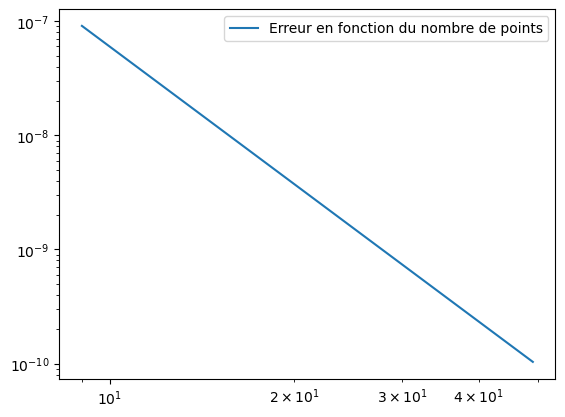

In [15]:
def f(x):
    return np.exp(x)
X=np.arange(9,50,1)
Y=[]
for x in X:
    Y.append(np.abs(simpson(f,0,1,x)-np.exp(1)+1))
plt.loglog(X,Y,label='Erreur en fonction du nombre de points')
plt.legend()
plt.show()

3. Nous souhaitons déterminer empiriquement la vitesse de convergence de la méthode de Simpson à l'aide de l'approximation des moindres carrés. Rappelons qu'il s'agit d'approcher une fonction $h$ par une fonction affine $\phi(x) = a x + b$, dont il faut déterminer les coefficients $a$ et $b$. Étant donnée une collection de points $y = (y_0, \ldots, y_{m-1})$, l'évaluation de $h$ en ces points donne le vecteur $z = (h(y_0), \ldots, h(y_{m-1}))$. L'évaluation de $\phi$ en ces points est donnée par la multiplication matricielle
$$
\begin{pmatrix} \phi(x_0) \\ \vdots \\ \phi(x_{m-1}) \end{pmatrix} = A u,
$$
où
$$
A = \begin{pmatrix} x_0 & 1 \\ \vdots & \vdots \\ x_{m-1} & 1 \end{pmatrix}, \quad \text{ et } \quad u = \begin{pmatrix} a \\ b \end{pmatrix}.
$$
L'approximation affine de la fonction $h$ au sens des moindres carrés est alors la fonction affine $\phi$ pour laquelle $u$ est solution du problème de minimisation
$$
\inf \sum_{i=0}^{m-1} \big\| [Au]_i - z_i \big\|^2,
$$
où $\| \cdot \|$ désigne la norme euclidienne de $\mathbb{R}^m$. La routine `numpy.linalg.lstsq(A,z)` renvoie une solution approchée $u$ de ce problème.

a. Utiliser l'approximation affine au sens des moindres carrés pour approcher la fonction $\log(n) \mapsto \log( e_n)$.

In [16]:
L=np.log(X)
Z=np.log(Y)
A=np.ones((len(X),2))
A[:,0]=np.transpose(L)
print('[a b] =',np.linalg.lstsq(A,Z,1e-15)[0],'\n')

[a b] = [-3.99984486 -7.4247984 ] 



b. En déduire empiriquement l'ordre de convergence de la méthode de Simpson.

L'approximation affine de la fonction $\log(n) \mapsto \log(e_n)$ est de la forme $\phi(x) = a x + b$, avec $a$ proche de $- 4$. Cette propriété signifie que
$$
\log(e_n) \approx - 4 \log(n) + b,
$$
ce qui conduit à l'approximation
$$
e_n \approx \frac{C}{n^4},
$$
où $C =e^b$. Étant donné que le pas $h$ considéré pour cette application de la méthode de Simpson est égal à $1/n$, cette approximation montre que l'erreur est de l'ordre de $h^4$, ce qui correspond à une méthode d'ordre $3$, et il est possible de vérifier qu'en effet, la méthode de Simpson est bien d'ordre $3$.

### Exercice 3.

1. Définir une fonction `E(n,x)` qui calcule numériquement l'intégrale
$$
E_n(x) = \int_1^{+ \infty} \frac{e^{- x t}}{t^n} \,dt.
$$

In [17]:
def E(n,x):
    def phi(t):
        return np.exp(-x*t)/(t**n)
    return sc_int.quad(phi,1,+np.inf)[0]
# Test de la fonction E
print('E(2,0) =',E(2,0),'\n')
print('E(5,0) =',E(5,0),'\n')

E(2,0) = 1.0 

E(5,0) = 0.24999999999999997 



2. Déterminer une approximation de l'intégrale double
$$
I = \int_0^{\pi} \int_0^y x \sin(x y) \, dx \, dy.
$$

In [18]:
def g(x,y):
    return x*np.sin(x*y)
def I(x):
    return x
print('I =',sc_int.dblquad(g,0,np.pi,0,I)[0],'\n')

I = 0.7026626450147284 



### Exercice 4.

1. Modifier la fonction `montecarlo(f,a,b,n)` pour qu'elle retourne en plus de la moyenne empirique $J_n^{mc}$ la variance empirique 
$$
V_n^{mc} = \frac{(b-a)^2}{n} \sum_{i=0}^{n-1} \Big( f(x_i) - \frac{J_n^{mc}}{b - a} \Big)^2.
$$

In [19]:
def montecarlo2(f,a,b,n):
    x=0
    y=0
    for i in range(n):
        t=np.random.uniform(a,b)
        x=x+f(t)
        y=y+f(t)**2
    x=(b-a)*x/n
    y=(b-a)**2/n*y-x**2
    return x,y

2.a. Pour un calcul d'intégrale de votre choix, tracer les valeurs de la variance empirique $V_n$ en fonction de $n$ obtenues lors d'une simulation.

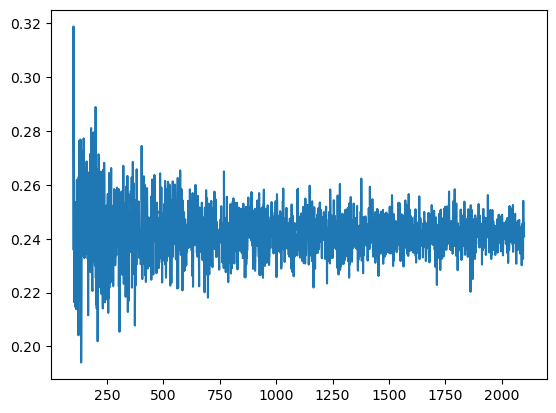

Var(f(X)) = 0.24203560745276498 



In [20]:
def f(x):
    return np.exp(x)
X=np.arange(100,2100,1)
Y=[]
for x in X:
    Y.append(montecarlo2(f,0,1,x)[1])
plt.plot(X,Y)
plt.show()
print('Var(f(X)) =',2*np.exp(1)-3/2-np.exp(2)/2,'\n')

b. Que constatez-vous ?

La variance empirique converge vers une valeur qui dans l'exemple précédent est proche de $0.24$. Cette convergence s'explique par le fait que la variance empirique tend vers la variance $\mathbb{V}ar(f(X))$, laquelle est donnée dans l'exemple précédent par la formule
$$
\mathbb{V}ar(f(X)) = \mathbb{E}(f(X)^2) - \mathbb{E}(f(X))^2 = \int_0^1 e^{2 x} \, dx - \bigg( \int_0^1 e^x \, dx \bigg)^2 = 2 e^1 - \frac{e^2 + 3}{2} \approx 0.24.
$$
